In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ,QuantumRegister,ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from iqx import *

# Loading your IBM Q account(s)
#provider = IBMQ.load_account()
from numpy import flip,array,binary_repr,insert

In [4]:
def to_binary(value, number_of_bits, lsb=False):
    """
    Function return binary in MSB
    :param value: value that will be converted
    :param number_of_bits:
    :returns: np.array that represents the binary configuration
    >>> to_binary(10,4)
    array([1, 0, 1, 0])
    >>> to_binary(10,4,True)
    array([0, 1, 0, 1])
    """
    if lsb == True:
        return flip(array(list(binary_repr(value, number_of_bits)), dtype=int))
    return array(list(binary_repr(value, number_of_bits)), dtype=int)

In [5]:
def get_adder_instruction():
    def majority(circ,a,b,c):
        circ.cx(c,b)
        circ.cx(c,a)
        circ.ccx(a, b, c)
    def unmaj(circ,a,b,c):
        circ.ccx(a, b, c)
        circ.cx(c, a)
        circ.cx(a, b)
    def adder_4_qubits(p, a0, a1, a2, a3, b0, b1, b2, b3, cin, cout):
        majority(p, cin, b0, a0)
        majority(p, a0, b1, a1)
        majority(p, a1, b2, a2)
        majority(p, a2, b3, a3)
        p.cx(a3, cout)
        unmaj(p, a2, b3, a3)
        unmaj(p, a1, b2, a2)
        unmaj(p, a0, b1, a1)
        unmaj(p, cin, b0, a0)
    a = QuantumRegister(8, "aop")
    b = QuantumRegister(8, "bop")
    c = QuantumRegister(2, "carry")

    add_circ = QuantumCircuit(a, b, c,name="Add")
    adder_4_qubits(add_circ, a[0], a[1], a[2], a[3], b[0], b[1], b[2], b[3], c[0], c[1])
    adder_4_qubits(add_circ, a[4], a[5], a[6], a[7], b[4], b[5], b[6], b[7], c[1], c[0])
    add8 = add_circ.to_instruction()
    add_circ.draw(output='mpl', plot_barriers=False, filename="adder.png") 
    return add8

In [28]:
a_reg = QuantumRegister(8,"aqreg")
b_reg = QuantumRegister(8,"bqreg")
carry= QuantumRegister(2,"carry")
cc = ClassicalRegister(8,"cc")
qc = QuantumCircuit(a_reg,b_reg,carry,cc)

In [29]:
adder_instr = get_adder_instruction()

In [30]:
val_a=to_binary(-12,8,True)
val_b=to_binary(8,8,True)
print("{0}\t{1}".format(val_a,val_b))
for i in range(0,8):
    if val_a[i]==1:
        qc.x(a_reg[i])
qc.barrier()
for i in range(0,8):
    if val_b[i]==1:
        qc.x(b_reg[i])

[0 0 1 0 1 1 1 1]	[0 0 0 1 0 0 0 0]


In [23]:
qc.append(adder_instr,[q for q in range(0,18)])
qc.draw()

░      ┌───────┐
aqreg_0: ──────░──────┤0      ├
               ░      │       │
aqreg_1: ──────░──────┤1      ├
         ┌───┐ ░      │       │
aqreg_2: ┤ X ├─░──────┤2      ├
         └───┘ ░      │       │
aqreg_3: ──────░──────┤3      ├
         ┌───┐ ░      │       │
aqreg_4: ┤ X ├─░──────┤4      ├
         ├───┤ ░      │       │
aqreg_5: ┤ X ├─░──────┤5      ├
         ├───┤ ░      │       │
aqreg_6: ┤ X ├─░──────┤6      ├
         ├───┤ ░      │       │
aqreg_7: ┤ X ├─░──────┤7      ├
         └───┘ ░      │       │
bqreg_0: ──────░──────┤8      ├
               ░      │   Add │
bqreg_1: ──────░──────┤9      ├
               ░      │       │
bqreg_2: ──────░──────┤10     ├
               ░ ┌───┐│       │
bqreg_3: ──────░─┤ X ├┤11     ├
               ░ └───┘│       │
bqreg_4: ──────░──────┤12     ├
               ░      │       │
bqreg_5: ──────░──────┤13     ├
               ░      │       │
bqreg_6: ──────░──────┤14     ├
               ░      │       │
bqreg_7: ──────░──────┤15     ├
               ░      │       │
carry_0: ──────░──────┤16     ├
               ░      │       │
carry_1: ──────░──────┤17     ├
               ░      └───────┘
   cc: 8/══════════════════════

In [27]:
a = to_binary(11,8,True)
b = to_binary(12,8,True)
c = to_binary(23,8,True)
print("{0}\t{1}\t{2}".format(a,b,c))

[1 1 0 1 0 0 0 0]	[0 0 1 1 0 0 0 0]	[1 1 1 0 1 0 0 0]


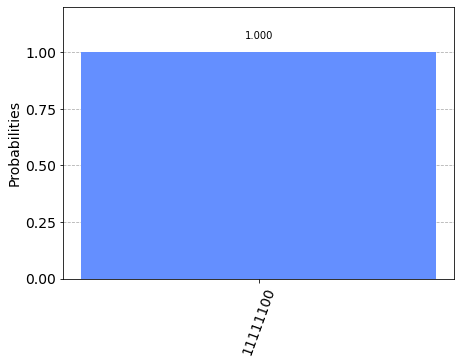

In [25]:
qc.measure(b_reg,cc)

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [26]:
print(answer)

{'11111100': 1024}
